# HW06 : Text Classification with RNN, LSTM, GRU

ในหัวข้อนี้จะได้เรียนรู้การสร้างโมเดลสำหรับจำแนกข้อความ โดยใช้วิธีต่างๆ ดังนี้

1) TF-IDF (used as input features) + Feed Forward Neural network

2) สร้าางโมเดลจำแนกข้อความโดยใช้ RNN ประเภทต่างๆ เช่น Simple RNN, LSTM, GRU

รวมไปถึงการประเมินประสิทธิภาพของแบบจำลอง


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in Google Drive
st = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/st_vote.csv'
tr = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/thairath.csv'
tns = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/topnews.csv'
eig = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/eigth.csv'
o = '/content/drive/MyDrive/project/data/Vote/Vote_check/cdata/one.csv'

# Read the CSV file into a pandas DataFrame
stdf = pd.read_csv(st, usecols=['text', 'vote','comment_id'])
thair= pd.read_csv(tr, usecols=['text', 'vote','comment_id'])
tnews = pd.read_csv(tns , usecols=['text', 'vote','comment_id'])
eigth = pd.read_csv(eig, usecols=['text', 'vote','comment_id'])
one = pd.read_csv(o, usecols=['text', 'vote','comment_id'])
# Merge DataFrames
merged_df = pd.concat([stdf, thair, tnews, eigth, one], ignore_index=True)
# Rename the 'vote' column to 'sentiment'
merged_df = merged_df.rename(columns={'vote': 'sentiment'})
merged_df = merged_df.drop_duplicates(subset='comment_id', keep='first')
print(len(stdf))
print(len(thair))
print(len(tnews))
print(len(eigth))
print(len(one))
print('รวม',len(merged_df))
merged_df


Mounted at /content/drive
10149
53637
28944
39351
16862
รวม 134656


,comment_id,text,sentiment
0,Ugyh4l_S6n_BoyEENvp4AaABAg,ศาลก็เหมือนโจรปล้นชาติ,neg
1,UgxBWKoCa98brokBWAJ4AaABAg,เราต้องเคารพกฏแต่พวกมันไม่ต้องเล่นตามกฏประเทศไ...,neg
2,Ugx0uyvH2i22DY1Fo9F4AaABAg,งงครับเป็นสสมาได้4ปีแต่จะเป็นนายกโดนตรวจสอบถ้า...,neg
3,UgwYvslC2R3Hlmw8K7p4AaABAg,คนดีๆเค้าจะมาช่วยประชาชนไอ้พวกชั่วนี้ก็ทำแบบเด...,neg
4,Ugw1SUgwqa8y2LCZCZB4AaABAg,เหมือนธนาธรเดะๆ,neu
...,...,...,...
148938,UgyM472fzhhlJm7GC254AaABAg,แล้วที่ทำไปเป็นเรื่องดีๆทั้งนั้นเลยนะครับสงสาร...,neu
148939,Ugx5qr4_4aKmmxjGi-h4AaABAg,รักนายกพิธานะคะ,pos
148940,Ugw5xq_wdeqCYymU91Z4AaABAg,8พรรคจับมือกันได้27ล้านเสียงส่วนพรรคที่เหลือได...,neu
148941,UgwzSUMvtvL1maMoWgx4AaABAg,เสียเวลา,neg


In [ ]:
merged_df['sentiment']= merged_df['sentiment'].replace('negneg', 'neg')
merged_df['sentiment']= merged_df['sentiment'].replace('neuneu', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('Ugz9C5TAmKoeTvFpbY54AaABAg', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('negneu', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('1neg', 'neg')
merged_df['sentiment']= merged_df['sentiment'].replace('UgxkLO4h_6atMp9pTNR4AaABAg', 'neg')
merged_df['sentiment']= merged_df['sentiment'].replace('Ugy2QAmA6OttftxtT354AaABAg', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('UgwtggQRyDPrI1ZJ3SF4AaABAg', 'neu')
merged_df['sentiment']= merged_df['sentiment'].replace('Ugxh80FmUbqYxse1F0F4AaABAg', 'neg')

In [ ]:
# Assuming 'sentiment' is the column name in your DataFrame
sentiment_counts = merged_df['sentiment'].value_counts()

# Display the counts
print(sentiment_counts)

neu    80514
neg    41081
pos    13030
Name: sentiment, dtype: int64


In [ ]:
selected_data = merged_df[merged_df['sentiment'].isin(['pos', 'neg', 'neu'])]
selected_data = selected_data.groupby('sentiment').head(13030)
selected_data

,comment_id,text,sentiment
0,Ugyh4l_S6n_BoyEENvp4AaABAg,ศาลก็เหมือนโจรปล้นชาติ,neg
1,UgxBWKoCa98brokBWAJ4AaABAg,เราต้องเคารพกฏแต่พวกมันไม่ต้องเล่นตามกฏประเทศไ...,neg
2,Ugx0uyvH2i22DY1Fo9F4AaABAg,งงครับเป็นสสมาได้4ปีแต่จะเป็นนายกโดนตรวจสอบถ้า...,neg
3,UgwYvslC2R3Hlmw8K7p4AaABAg,คนดีๆเค้าจะมาช่วยประชาชนไอ้พวกชั่วนี้ก็ทำแบบเด...,neg
4,Ugw1SUgwqa8y2LCZCZB4AaABAg,เหมือนธนาธรเดะๆ,neu
...,...,...,...
148882,Ugy7wTbOd4fuJwgPMYZ4AaABAg,ผมชอบมาก,pos
148906,Ugxqy5KQJv3wNEJQrr54AaABAg,ลุงป้มสู้ๆ,pos
148922,UgxCFTmAgVJq63nqBa54AaABAg,ขอบคุณเพื่อไทยที่ยึดมั่นจับมือกันไว้นะคะ,pos
148927,UgyCRG80MThcA4GRfMx4AaABAg,ขอให้8พรรคจับมือกันให้แน่นอย่าข้ามขั้วเป็นฝ่าย...,pos


# Data Preparation

ในบทนี้เราจะใช้ข้อมูลของ Wongnai Sentiment Corpus มาใช้ในการสร้างแบบจำลอง



In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 62.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

sentiment_df = selected_data.copy()



In [ ]:
sentiment_df

,comment_id,text,sentiment
0,Ugyh4l_S6n_BoyEENvp4AaABAg,ศาลก็เหมือนโจรปล้นชาติ,neg
1,UgxBWKoCa98brokBWAJ4AaABAg,เราต้องเคารพกฏแต่พวกมันไม่ต้องเล่นตามกฏประเทศไ...,neg
2,Ugx0uyvH2i22DY1Fo9F4AaABAg,งงครับเป็นสสมาได้4ปีแต่จะเป็นนายกโดนตรวจสอบถ้า...,neg
3,UgwYvslC2R3Hlmw8K7p4AaABAg,คนดีๆเค้าจะมาช่วยประชาชนไอ้พวกชั่วนี้ก็ทำแบบเด...,neg
4,Ugw1SUgwqa8y2LCZCZB4AaABAg,เหมือนธนาธรเดะๆ,neu
...,...,...,...
148882,Ugy7wTbOd4fuJwgPMYZ4AaABAg,ผมชอบมาก,pos
148906,Ugxqy5KQJv3wNEJQrr54AaABAg,ลุงป้มสู้ๆ,pos
148922,UgxCFTmAgVJq63nqBa54AaABAg,ขอบคุณเพื่อไทยที่ยึดมั่นจับมือกันไว้นะคะ,pos
148927,UgyCRG80MThcA4GRfMx4AaABAg,ขอให้8พรรคจับมือกันให้แน่นอย่าข้ามขั้วเป็นฝ่าย...,pos


In [ ]:
from pythainlp.tokenize import word_tokenize
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def thai_clean_text(text):
    st = ""

    #สามารถเพิ่มโค้ด สำหรับคลีน ข้อความ เช่น ลบ emoji ออก เป็นต้น
    text = deEmojify(text)
    text = text.replace("\n"," ")
    for w in word_tokenize(text):
        st = st + w + " "

    return  re.sub(' +', ' ', st)

sentiment_df['text'] = sentiment_df.text.apply(thai_clean_text)
sentiment_df = sentiment_df.dropna()

In [ ]:

# ใช้ .str.strip() เพื่อลบช่องว่างที่อยู่ที่เริ่มหรือสิ้นสุดข้อความ
sentiment_df['sentiment'] = sentiment_df['sentiment'].str.strip()

# หรือถ้าคุณต้องการลบ white spaces ทั้งหมดในข้อความ
sentiment_df['sentiment'] = sentiment_df['sentiment'].str.replace(r'\s+', '', regex=True)


จำนวนข้อความทั้งหมด 42543
neg    14181
neu    14181
pos    14181
Name: sentiment, dtype: int64


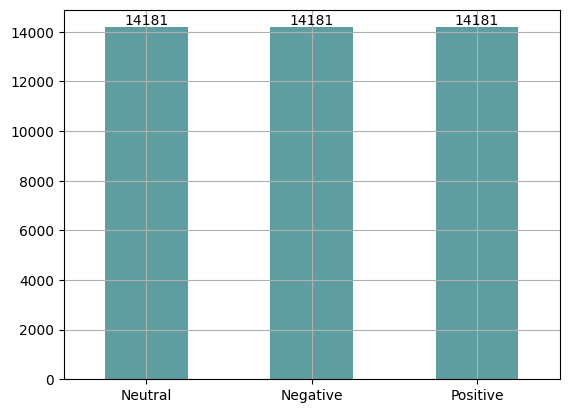

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Print information about the dataset
print('จำนวนข้อความทั้งหมด', len(sentiment_df))
print(sentiment_df['sentiment'].value_counts())

# Create histogram
ax = sentiment_df["sentiment"].value_counts().plot(kind='bar', color='cadetblue')
plt.grid(True)


# Set x-axis labels and positions with right alignment
plt.xticks(ticks=[0, 1, 2], labels=[ 'Neutral','Negative', 'Positive'], ha='center')
plt.xticks(rotation=0)
# Add values on top of the bars
for i, value in enumerate(sentiment_df['sentiment'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

# Show the plot
plt.show()


In [ ]:
sentiment_df[2887:]


,text,sentiment
2887,อย่า พูด คำ ว่า ตลอดไป เพราะ ความเป็นจริง นี้ ...,neu
2888,กาฝาก,neu
2889,มัน น่า ยิ่งนัก,neu
2890,ค,neu
2891,เอา มัน ไป เก็บ ดิ,neu
...,...,...
10144,โคตร จัญ เฮ้อ,neu
10145,ใช่ พลาด มาก และ ผิดหวัง กับ ประธาน สภา มาก เล...,neg
10146,ประ ยุทธ ตั้ง สว สว ตั้ง กก ตสว ตั้ง ศาลรัฐธรร...,neg
10147,กู ละ เชื่อ เลย แบบนี้ ตลอด,neu


In [ ]:
balanced_data["sentiment"].hist()

NameError: name 'balanced_data' is not defined

In [ ]:
balanced_data[balanced_data['sentiment'] == 'neu']

,text,sentiment
3540,เหมือน ธนา ธร เดะ ๆ,neu
3541,เลือกตั้ง ครั้ง ไห ม่ รับรอง ใฉไล กว่า เดิม,neu
3542,โดน เหมือน ธนา ธร เลย น้ำตา จะ ไหล,neu
3543,เลือกตั้ง ครั้งหน้า กิน เต็ม แบบ ไม่ มี คู่แข่...,neu
3544,คนเลว ออก ไป แล้ว,neu
...,...,...
5305,ศาสนา วัด บาง คลาน 555 หลวงพ่อ เงิน,neu
5306,ค,neu
5307,งั้น ไม่ แก้ 112 จะ โหวต ให้ ไหม,neu
5308,ไป รายงานตัว รึ ยัง คุก ๆ,neu


# TF-IDF + Feed Forward Neural Network

ในส่วนนี้เราจะใช้ข้อมูลชุดเดิมและใช้ TF-IDF ในการแทนแต่ละประโยคหลังจากนั้นก็เทรน ด้วย Feed Forward Neural Network

โค้ดดัดแปลงมาจาก https://colab.research.google.com/drive/1SR_j7FUYcJ21CCsIT8fkRjGOteevQEPa#scrollTo=4Wf_YSr78IMO

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
# ตรวจสอบ column ใน DataFrame
print(sentiment_df.columns)

# ตั้งชื่อ column ที่ถูกต้อง (เช่น 'text' และ 'sentiment')
texts = sentiment_df['text'].values
labels = sentiment_df['sentiment'].values

# ตรวจสอบว่ามีข้อมูลใน labels หรือไม่
labels
print(sentiment_df.columns)

Index(['comment_id', 'text', 'sentiment'], dtype='object')
Index(['comment_id', 'text', 'sentiment'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import torch
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# แบ่งข้อมูลเป็น train 80% validation 20%
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['sentiment'])

# เตรียมข้อมูลสำหรับการเทรนและทดสอบ
train_sentences = train_data['wordseged_space_text'].values
train_labels = train_data['sentiment'].values

val_sentences = val_data['wordseged_space_text'].values
val_labels = val_data['sentiment'].values

test_sentences = test_data['wordseged_space_text'].values
test_labels = test_data['sentiment'].values

# ทำการเข้ารหัส labels
encoder = LabelEncoder()
train_encoded_labels = encoder.fit_transform(train_labels)
val_encoded_labels = encoder.transform(val_labels)
test_encoded_labels = encoder.transform(test_labels)

# สร้าง vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, dtype=np.float32)

# ใช้ชุดเทรนในการสร้าง vectorizer
tfidfX_train = tfidf_vectorizer.fit_transform(train_sentences)
tfidfX_train = torch.tensor(tfidfX_train.toarray())

# ใช้ vectorizer ในการแปลงชุดตรวจสอบและทดสอบ
tfidfX_val = tfidf_vectorizer.transform(val_sentences)
tfidfX_val = torch.tensor(tfidfX_val.toarray())

tfidfX_test = tfidf_vectorizer.transform(test_sentences)
tfidfX_test = torch.tensor(tfidfX_test.toarray())

print("TF-IDF train shape:", tfidfX_train.shape)
print("TF-IDF test shape:", tfidfX_test.shape)
print("TF-IDF val shape:", tfidfX_val.shape)


TF-IDF train shape: torch.Size([25017, 1000])
TF-IDF test shape: torch.Size([7818, 1000])
TF-IDF val shape: torch.Size([6255, 1000])


In [ ]:
train_sentences

array(['ไล่ สว 237 ออก', 'ก้าวไกล เพื่อ ไทย อย่า ยอมแพ้',
       'เขา ด่า สว แต่ โยง ว่า ทำลาย ชาติ', ...,
       'ร้อง ได้ ดีมาก ๆ เลย ค่ะ มัน ตรง กับ ใจ มาก ที่สุด เลย ขอ ขอบคุณ ที่ แต่งเพลง นี้ และ ร้อง ได้ เพราะ มาก ค่ะ',
       'คุณ พิธา คุณ คือ นายก ของ ใจ คนไทย ทั้งปวง',
       'ชอบ เพลง มาก ๆๆ สู้ ๆพื่น้อง เพื่อ นายก พิธา'], dtype=object)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

# texts = balanced_data['text'].values
# labels = balanced_data['sentiment'].values
# encoder = LabelEncoder()

# # ทำการเข้ารหัส labels
# encoded_labels = encoder.fit_transform(labels)

# train_sentences, test_sentences, train_labels, test_labels = train_test_split(texts, encoded_labels, stratify = encoded_labels,test_size=0.2, random_state=123)



In [ ]:
# import numpy as np

# # สมมติว่าคุณมี train_encoded_labels ซึ่งเก็บค่าของป้ายกำกับที่ถูกเข้ารหัส
# # และคุณต้องการสุ่มแถวของ train_encoded_labels ที่มีขนาด 2 ตัวอย่าง
# sampled_rows = np.random.choice(train_encoded_labels.shape[0], size=10, replace=True)

# # ดึงค่าของป้ายกำกับที่ถูกเข้ารหัสจาก sampled_rows
# sampled_labels = train_encoded_labels[sampled_rows]

# # แสดงค่าที่ถูกสุ่มขึ้นมา
# print("Sampled Labels:\n", sampled_labels)


Sampled Labels:
 [0 0 1 1 0 2 1 0 1 0]


In [ ]:
# สมมติว่า encoder เป็น LabelEncoder ที่ถูกใช้ในการเข้ารหัส
# encoded_labels เป็นค่าที่ได้จากการเข้ารหัส

# ใช้ inverse_transform เพื่อแปลงค่าที่เข้ารหัสกลับไปเป็นค่าเดิม
original_labels = encoder.inverse_transform(encoded_labels)

# ตอนนี้ original_labels จะเป็นค่าเดิมของ sentimets
print(original_labels[2000])
print(encoded_labels[2000])

NameError: name 'encoded_labels' is not defined

<Axes: >

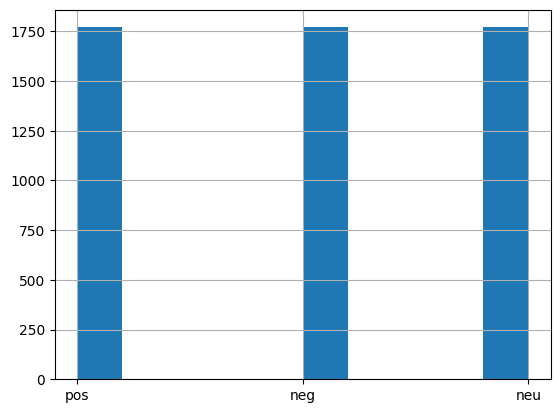

In [ ]:
balanced_data["sentiment"].hist()

In [ ]:
# ตรวจสอบค่าที่มี train_encoded_labels เป็น -1
indices_with_minus_one = [index for index, label in enumerate(train_encoded_labels) if label == 3]

# พิมพ์ค่าที่มี train_encoded_labels เป็น -1
for index in indices_with_minus_one:
    print(f"Index: {index}, Label: {train_encoded_labels[index]}")


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import torch
# from pythainlp.util import normalize
# from pythainlp.corpus import thai_stopwords
# from pythainlp.tokenize import word_tokenize


# train = list(train_sentences)
# val = list(test_sentences)[:int(len(test_sentences)/2)]
# test = list(test_sentences)[int(len(test_sentences)/2):]


# stopwords = list(thai_stopwords())
# stopwords.append("nan")
# stopwords.append("-")
# stopwords.append("_")
# stopwords.append("")
# stopwords.append(" ")

# tfidf_vectorizer = TfidfVectorizer(max_features=1000, dtype=np.float32)

# #ใช้ชุดเทรน ทำ vectorizer
# tfidfX_train = tfidf_vectorizer.fit_transform(train)
# tfidfX_train = torch.tensor(tfidfX_train.toarray())

# tfidfX_val = tfidf_vectorizer.transform(val)
# tfidfX_val = torch.tensor(tfidfX_val.toarray())

# tfidfX_test = tfidf_vectorizer.transform(test)
# tfidfX_test = torch.tensor(tfidfX_test.toarray())

# print("TF-IDF train shape:", tfidfX_train.shape)
# print("TF-IDF test shape:", tfidfX_test.shape)
# print("TF-IDF val shape:", tfidfX_val.shape)

In [ ]:
import torch
import numpy as np

# Assuming train_labels, test_labels, etc. are NumPy arrays
# Convert the labels to the appropriate data type before creating PyTorch tensors

Y_train = torch.squeeze(torch.tensor(train_encoded_labels).long())
Y_val = torch.squeeze(torch.tensor(val_encoded_labels).long())  # Corrected from test_labels to val_labels
Y_test = torch.squeeze(torch.tensor(test_encoded_labels).long())

print("Y train shape:", Y_train.shape)
print("Y validation shape:", Y_val.shape)  # Corrected from "Y shape" to "Y validation shape"
print("Y test shape:", Y_test.shape)


Y train shape: torch.Size([25017])
Y validation shape: torch.Size([6255])
Y test shape: torch.Size([7818])


In [ ]:
# import torch
# Y_train = torch.squeeze(torch.tensor(train_labels).long())
# Y_val = torch.squeeze(torch.tensor(test_labels[:int(len(test_sentences)/2)]).long())
# Y_test = torch.squeeze(torch.tensor(test_labels[int(len(test_sentences)/2):]).long())

# print("Y train shape:", Y_train.shape)
# print("Y test shape:", Y_test.shape)
# print("Y shape:", Y_val.shape)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cpu


In [ ]:
#สร้าง FFNN ขึ้นมา
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim):
        super(FFNN, self).__init__()

        # Linear function 1
        self.layer_1 = nn.Linear(input_dim, hidden_dim_1)
        # self.dropout = nn.Dropout(0.3)
        # self.batch1 = nn.BatchNorm1d(hidden_dim)

        # Non-linearity 1
        self.relu_1 = nn.ReLU()

        # Linear function 2
        self.layer_2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        # Non-linearity 2
        self.relu_2 = nn.ReLU()

        # Linear function 3
        self.layer_3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu_1(out)

        out = self.layer_2(out)
        out = self.relu_2(out)

        out = self.layer_3(out)

        return torch.sigmoid(out)

In [ ]:
# กำหนดพารามิเตอร์
input_dim = tfidfX_train.shape[1]
hidden_dim_1 = 512 #จำนวนโหนด
hidden_dim_2 = 512
output_dim = 3 #จำนวน output dim ใช้ 1 ได้ คือเราอยากจะทำนายค่าออกมาค่าเดียว 0 = negative และ 1 คือ เป็น positive #แก้ label
num_epochs = 200

# สร้าง model จากคลาส
first_model = FFNN(input_dim, hidden_dim_1, hidden_dim_2, output_dim)

# Define loss function.
criterion = nn.CrossEntropyLoss()


# Define as optimizer Adam.
optimizer = optim.Adam(first_model.parameters(),lr=0.1e-3,weight_decay=1e-3)

# Transfer all the computation to GPU (cuda device).
first_model.to(device)
criterion = criterion.to(device)

In [ ]:
from torchsummary import summary

# กำหนด device ให้เป็น cuda หากใช้ GPU, ไม่งั้นให้ใช้ cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ย้ายโมเดลไปที่ GPU หากใช้ cuda
first_model.to(device)

# ใช้ torchsummary ในการแสดงสรุปของโมเดล
summary(first_model, input_size=(input_dim,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         512,512
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 512]         262,656
              ReLU-4                  [-1, 512]               0
            Linear-5                    [-1, 3]           1,539
Total params: 776,707
Trainable params: 776,707
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.96
Estimated Total Size (MB): 2.98
----------------------------------------------------------------


In [ ]:
from tqdm import tqdm

# This is a function that calculate the accuracy manually
def calculate_accuracy(y_true, y_pred):
  y_pred = torch.round(y_pred)
  #print(y_pred.argmax(-1))
  correct = (y_true == y_pred.argmax(-1)).float()
  acc = correct.sum() / len(correct)
  return acc

batch_size = 32 #ปรับได้

print(tfidfX_train.shape)
print(Y_train.shape)
# Split train dataset to mini batches
X_train_mini_batches = torch.split(tfidfX_train,batch_size)
Y_train_mini_batches = torch.split(Y_train,batch_size)



train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Start training
for epoch in range(num_epochs):
  print('epoch',epoch)
  epoch_loss = 0
  epoch_accuracy = 0
  validation_loss=0
  val_accuracy=0

  for X_train_mini_batch,Y_train_mini_batch in tqdm(zip(X_train_mini_batches,Y_train_mini_batches)):

    X_train_mini_batch = X_train_mini_batch.to(device)
    Y_train_mini_batch = Y_train_mini_batch.to(device)

    if Y_train_mini_batch.shape[0]==0:
        continue



    # Forward pass to get output
    train_prediction = first_model.forward(X_train_mini_batch.float())
    train_prediction = torch.squeeze(train_prediction)

    #print(Y_train_mini_batch.shape,train_prediction.shape)


    # Calculate Loss
    train_loss = criterion(train_prediction,Y_train_mini_batch)



    # Clearing up accumulated gradients
    optimizer.zero_grad()

    # Getting gradients
    train_loss.backward()

    # Updating parameters
    optimizer.step()

    # Add each mini batch's loss
    epoch_loss += train_loss.item()

    # Add each mini batch's accuracy
    epoch_accuracy += calculate_accuracy(Y_train_mini_batch,train_prediction)

  # For some epochs print loss and accucary of train and validation set.
  if epoch % 1 == 0:

    tfidfX_val = tfidfX_val.to(device)
    Y_val = Y_val.to(device)

    # Forward pass to get output
    val_prediction = first_model.forward(tfidfX_val.float())
    val_prediction = torch.squeeze(val_prediction)

    # Calculate Loss
    print(val_prediction.shape,Y_val.shape)
    val_loss = criterion(val_prediction,Y_val)

    # Add each mini batch's loss
    validation_loss = val_loss.item()

    # Add each mini batch's accuracy
    val_accuracy = calculate_accuracy(Y_val,val_prediction)

    epoch_loss /= len(X_train_mini_batches)
    epoch_accuracy /= len(X_train_mini_batches)
    val_losses.append(validation_loss)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_accuracies.append(val_accuracy)
    print("Epoch:",epoch, "\n"
           "Train_loss:",round(epoch_loss,4), "Train Accuracy:",round(epoch_accuracy.item(),4), "\n"
           "Validation_loss:  ",round(validation_loss,4), "Validation Accuracy:  ",round(val_accuracy.item(),4), "\n")

# Save PyTorch model state dict to a file
torch.save(first_model.state_dict(), 'FFNN_model.pth')

torch.Size([25017, 1000])
torch.Size([25017])
epoch 0


782it [00:06, 115.01it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 0 
Train_loss: 0.988 Train Accuracy: 0.5549 
Validation_loss:   0.8893 Validation Accuracy:   0.6406 

epoch 1


782it [00:08, 91.87it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 1 
Train_loss: 0.8715 Train Accuracy: 0.6558 
Validation_loss:   0.8672 Validation Accuracy:   0.6635 

epoch 2


782it [00:42, 18.59it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 2 
Train_loss: 0.8549 Train Accuracy: 0.6752 
Validation_loss:   0.8568 Validation Accuracy:   0.6729 

epoch 3


782it [00:56, 13.78it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 3 
Train_loss: 0.8457 Train Accuracy: 0.6909 
Validation_loss:   0.8502 Validation Accuracy:   0.683 

epoch 4


782it [01:00, 12.88it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 4 
Train_loss: 0.8389 Train Accuracy: 0.704 
Validation_loss:   0.8439 Validation Accuracy:   0.6988 

epoch 5


782it [01:09, 11.30it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 5 
Train_loss: 0.8297 Train Accuracy: 0.7211 
Validation_loss:   0.8273 Validation Accuracy:   0.7209 

epoch 6


782it [01:12, 10.80it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 6 
Train_loss: 0.803 Train Accuracy: 0.7311 
Validation_loss:   0.8035 Validation Accuracy:   0.7378 

epoch 7


782it [01:06, 11.71it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 7 
Train_loss: 0.7878 Train Accuracy: 0.7399 
Validation_loss:   0.7964 Validation Accuracy:   0.7434 

epoch 8


782it [00:52, 14.89it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 8 
Train_loss: 0.7814 Train Accuracy: 0.7465 
Validation_loss:   0.7929 Validation Accuracy:   0.7447 

epoch 9


782it [00:39, 19.82it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 9 
Train_loss: 0.7778 Train Accuracy: 0.7507 
Validation_loss:   0.791 Validation Accuracy:   0.7448 

epoch 10


782it [00:41, 18.91it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 10 
Train_loss: 0.7754 Train Accuracy: 0.752 
Validation_loss:   0.7897 Validation Accuracy:   0.746 

epoch 11


782it [00:48, 16.28it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 11 
Train_loss: 0.7737 Train Accuracy: 0.7541 
Validation_loss:   0.7888 Validation Accuracy:   0.7461 

epoch 12


782it [00:48, 16.09it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 12 
Train_loss: 0.7725 Train Accuracy: 0.755 
Validation_loss:   0.7881 Validation Accuracy:   0.7461 

epoch 13


782it [00:49, 15.65it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 13 
Train_loss: 0.7716 Train Accuracy: 0.7553 
Validation_loss:   0.7875 Validation Accuracy:   0.7471 

epoch 14


782it [00:51, 15.21it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 14 
Train_loss: 0.7708 Train Accuracy: 0.756 
Validation_loss:   0.7871 Validation Accuracy:   0.7477 

epoch 15


782it [00:50, 15.39it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 15 
Train_loss: 0.7702 Train Accuracy: 0.7572 
Validation_loss:   0.7868 Validation Accuracy:   0.7474 

epoch 16


782it [00:52, 14.95it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 16 
Train_loss: 0.7697 Train Accuracy: 0.7574 
Validation_loss:   0.7865 Validation Accuracy:   0.7477 

epoch 17


782it [00:50, 15.49it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 17 
Train_loss: 0.7693 Train Accuracy: 0.7583 
Validation_loss:   0.7863 Validation Accuracy:   0.7474 

epoch 18


782it [00:48, 16.27it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 18 
Train_loss: 0.769 Train Accuracy: 0.7591 
Validation_loss:   0.786 Validation Accuracy:   0.7479 

epoch 19


782it [00:45, 17.08it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 19 
Train_loss: 0.7687 Train Accuracy: 0.7598 
Validation_loss:   0.7859 Validation Accuracy:   0.7482 

epoch 20


782it [00:46, 16.99it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 20 
Train_loss: 0.7684 Train Accuracy: 0.7603 
Validation_loss:   0.7857 Validation Accuracy:   0.7484 

epoch 21


782it [00:47, 16.45it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 21 
Train_loss: 0.7682 Train Accuracy: 0.7608 
Validation_loss:   0.7856 Validation Accuracy:   0.7482 

epoch 22


782it [00:45, 17.10it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 22 
Train_loss: 0.768 Train Accuracy: 0.761 
Validation_loss:   0.7855 Validation Accuracy:   0.7485 

epoch 23


782it [00:43, 18.19it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 23 
Train_loss: 0.7678 Train Accuracy: 0.7612 
Validation_loss:   0.7853 Validation Accuracy:   0.7488 

epoch 24


782it [00:44, 17.63it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 24 
Train_loss: 0.7677 Train Accuracy: 0.7613 
Validation_loss:   0.7852 Validation Accuracy:   0.7488 

epoch 25


782it [00:47, 16.35it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 25 
Train_loss: 0.7675 Train Accuracy: 0.7615 
Validation_loss:   0.7852 Validation Accuracy:   0.749 

epoch 26


782it [00:49, 15.94it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 26 
Train_loss: 0.7674 Train Accuracy: 0.7619 
Validation_loss:   0.7851 Validation Accuracy:   0.7488 

epoch 27


782it [00:46, 16.73it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 27 
Train_loss: 0.7673 Train Accuracy: 0.7622 
Validation_loss:   0.785 Validation Accuracy:   0.7485 

epoch 28


782it [00:47, 16.35it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 28 
Train_loss: 0.7672 Train Accuracy: 0.7624 
Validation_loss:   0.7849 Validation Accuracy:   0.7482 

epoch 29


782it [00:46, 16.75it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 29 
Train_loss: 0.7671 Train Accuracy: 0.7625 
Validation_loss:   0.7848 Validation Accuracy:   0.7479 

epoch 30


782it [00:48, 16.17it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 30 
Train_loss: 0.767 Train Accuracy: 0.7627 
Validation_loss:   0.7848 Validation Accuracy:   0.7477 

epoch 31


782it [00:48, 16.08it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 31 
Train_loss: 0.7669 Train Accuracy: 0.7627 
Validation_loss:   0.7847 Validation Accuracy:   0.7484 

epoch 32


782it [00:45, 17.18it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 32 
Train_loss: 0.7668 Train Accuracy: 0.7632 
Validation_loss:   0.7847 Validation Accuracy:   0.7482 

epoch 33


782it [00:48, 15.97it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 33 
Train_loss: 0.7667 Train Accuracy: 0.7632 
Validation_loss:   0.7846 Validation Accuracy:   0.748 

epoch 34


782it [00:49, 15.65it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 34 
Train_loss: 0.7666 Train Accuracy: 0.7636 
Validation_loss:   0.7846 Validation Accuracy:   0.7487 

epoch 35


782it [00:45, 17.16it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 35 
Train_loss: 0.7666 Train Accuracy: 0.7637 
Validation_loss:   0.7845 Validation Accuracy:   0.7484 

epoch 36


782it [00:44, 17.75it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 36 
Train_loss: 0.7665 Train Accuracy: 0.7638 
Validation_loss:   0.7845 Validation Accuracy:   0.7482 

epoch 37


782it [00:42, 18.28it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 37 
Train_loss: 0.7664 Train Accuracy: 0.7639 
Validation_loss:   0.7844 Validation Accuracy:   0.7482 

epoch 38


782it [00:46, 16.91it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 38 
Train_loss: 0.7664 Train Accuracy: 0.764 
Validation_loss:   0.7844 Validation Accuracy:   0.7484 

epoch 39


782it [00:46, 16.94it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 39 
Train_loss: 0.7663 Train Accuracy: 0.7641 
Validation_loss:   0.7843 Validation Accuracy:   0.748 

epoch 40


782it [00:49, 15.71it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 40 
Train_loss: 0.7662 Train Accuracy: 0.7643 
Validation_loss:   0.7843 Validation Accuracy:   0.7487 

epoch 41


782it [00:49, 15.65it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 41 
Train_loss: 0.7662 Train Accuracy: 0.7643 
Validation_loss:   0.7842 Validation Accuracy:   0.749 

epoch 42


782it [00:48, 15.99it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 42 
Train_loss: 0.7661 Train Accuracy: 0.7644 
Validation_loss:   0.7842 Validation Accuracy:   0.749 

epoch 43


782it [00:49, 15.77it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 43 
Train_loss: 0.766 Train Accuracy: 0.7645 
Validation_loss:   0.7842 Validation Accuracy:   0.7488 

epoch 44


782it [00:52, 14.92it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 44 
Train_loss: 0.766 Train Accuracy: 0.7647 
Validation_loss:   0.7841 Validation Accuracy:   0.7488 

epoch 45


782it [00:48, 15.97it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 45 
Train_loss: 0.7659 Train Accuracy: 0.7648 
Validation_loss:   0.7841 Validation Accuracy:   0.7492 

epoch 46


782it [00:45, 17.12it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 46 
Train_loss: 0.7659 Train Accuracy: 0.7649 
Validation_loss:   0.7841 Validation Accuracy:   0.7492 

epoch 47


782it [00:45, 17.34it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 47 
Train_loss: 0.7658 Train Accuracy: 0.7649 
Validation_loss:   0.784 Validation Accuracy:   0.7492 

epoch 48


782it [00:47, 16.34it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 48 
Train_loss: 0.7658 Train Accuracy: 0.7651 
Validation_loss:   0.784 Validation Accuracy:   0.7493 

epoch 49


782it [00:47, 16.42it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 49 
Train_loss: 0.7657 Train Accuracy: 0.7653 
Validation_loss:   0.784 Validation Accuracy:   0.749 

epoch 50


782it [00:50, 15.64it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 50 
Train_loss: 0.7657 Train Accuracy: 0.7655 
Validation_loss:   0.784 Validation Accuracy:   0.7488 

epoch 51


782it [00:50, 15.36it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 51 
Train_loss: 0.7656 Train Accuracy: 0.7656 
Validation_loss:   0.7839 Validation Accuracy:   0.7488 

epoch 52


782it [00:52, 14.96it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 52 
Train_loss: 0.7656 Train Accuracy: 0.7658 
Validation_loss:   0.7839 Validation Accuracy:   0.7488 

epoch 53


782it [00:52, 14.85it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 53 
Train_loss: 0.7655 Train Accuracy: 0.7658 
Validation_loss:   0.7839 Validation Accuracy:   0.7488 

epoch 54


782it [00:52, 14.85it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 54 
Train_loss: 0.7655 Train Accuracy: 0.7657 
Validation_loss:   0.7839 Validation Accuracy:   0.749 

epoch 55


782it [00:54, 14.30it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 55 
Train_loss: 0.7654 Train Accuracy: 0.7657 
Validation_loss:   0.7838 Validation Accuracy:   0.7488 

epoch 56


782it [01:00, 12.94it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 56 
Train_loss: 0.7654 Train Accuracy: 0.7658 
Validation_loss:   0.7838 Validation Accuracy:   0.7492 

epoch 57


782it [00:50, 15.60it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 57 
Train_loss: 0.7653 Train Accuracy: 0.7658 
Validation_loss:   0.7838 Validation Accuracy:   0.749 

epoch 58


782it [00:50, 15.56it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 58 
Train_loss: 0.7653 Train Accuracy: 0.7661 
Validation_loss:   0.7838 Validation Accuracy:   0.7487 

epoch 59


782it [00:51, 15.09it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 59 
Train_loss: 0.7652 Train Accuracy: 0.766 
Validation_loss:   0.7837 Validation Accuracy:   0.749 

epoch 60


782it [00:48, 16.08it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 60 
Train_loss: 0.7652 Train Accuracy: 0.7661 
Validation_loss:   0.7837 Validation Accuracy:   0.7492 

epoch 61


782it [00:51, 15.23it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 61 
Train_loss: 0.7652 Train Accuracy: 0.766 
Validation_loss:   0.7837 Validation Accuracy:   0.7493 

epoch 62


782it [01:02, 12.48it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 62 
Train_loss: 0.7651 Train Accuracy: 0.7661 
Validation_loss:   0.7836 Validation Accuracy:   0.749 

epoch 63


782it [01:02, 12.57it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 63 
Train_loss: 0.7651 Train Accuracy: 0.7662 
Validation_loss:   0.7836 Validation Accuracy:   0.7492 

epoch 64


782it [01:06, 11.72it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 64 
Train_loss: 0.765 Train Accuracy: 0.7665 
Validation_loss:   0.7836 Validation Accuracy:   0.7493 

epoch 65


782it [01:05, 11.87it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 65 
Train_loss: 0.765 Train Accuracy: 0.7665 
Validation_loss:   0.7836 Validation Accuracy:   0.7495 

epoch 66


782it [00:56, 13.84it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 66 
Train_loss: 0.7649 Train Accuracy: 0.7662 
Validation_loss:   0.7835 Validation Accuracy:   0.749 

epoch 67


782it [01:04, 12.19it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 67 
Train_loss: 0.7649 Train Accuracy: 0.7666 
Validation_loss:   0.7835 Validation Accuracy:   0.7495 

epoch 68


782it [01:10, 11.13it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 68 
Train_loss: 0.7649 Train Accuracy: 0.7666 
Validation_loss:   0.7835 Validation Accuracy:   0.749 

epoch 69


782it [01:01, 12.81it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 69 
Train_loss: 0.7648 Train Accuracy: 0.7667 
Validation_loss:   0.7835 Validation Accuracy:   0.749 

epoch 70


782it [01:07, 11.52it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 70 
Train_loss: 0.7648 Train Accuracy: 0.7667 
Validation_loss:   0.7834 Validation Accuracy:   0.7488 

epoch 71


782it [01:08, 11.38it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 71 
Train_loss: 0.7647 Train Accuracy: 0.7667 
Validation_loss:   0.7834 Validation Accuracy:   0.7488 

epoch 72


782it [01:10, 11.04it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 72 
Train_loss: 0.7647 Train Accuracy: 0.7668 
Validation_loss:   0.7834 Validation Accuracy:   0.7498 

epoch 73


782it [01:04, 12.06it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 73 
Train_loss: 0.7647 Train Accuracy: 0.7668 
Validation_loss:   0.7834 Validation Accuracy:   0.7498 

epoch 74


782it [01:04, 12.20it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 74 
Train_loss: 0.7646 Train Accuracy: 0.7668 
Validation_loss:   0.7833 Validation Accuracy:   0.7496 

epoch 75


782it [01:00, 12.94it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 75 
Train_loss: 0.7646 Train Accuracy: 0.7668 
Validation_loss:   0.7833 Validation Accuracy:   0.7495 

epoch 76


782it [00:57, 13.60it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 76 
Train_loss: 0.7645 Train Accuracy: 0.7668 
Validation_loss:   0.7833 Validation Accuracy:   0.7496 

epoch 77


782it [01:06, 11.70it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 77 
Train_loss: 0.7645 Train Accuracy: 0.7668 
Validation_loss:   0.7833 Validation Accuracy:   0.7496 

epoch 78


782it [01:07, 11.65it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 78 
Train_loss: 0.7645 Train Accuracy: 0.7669 
Validation_loss:   0.7833 Validation Accuracy:   0.7495 

epoch 79


782it [00:59, 13.18it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 79 
Train_loss: 0.7644 Train Accuracy: 0.7671 
Validation_loss:   0.7832 Validation Accuracy:   0.7493 

epoch 80


782it [01:08, 11.40it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 80 
Train_loss: 0.7644 Train Accuracy: 0.7672 
Validation_loss:   0.7832 Validation Accuracy:   0.7493 

epoch 81


782it [01:08, 11.40it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 81 
Train_loss: 0.7643 Train Accuracy: 0.7673 
Validation_loss:   0.7832 Validation Accuracy:   0.7493 

epoch 82


782it [01:04, 12.21it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 82 
Train_loss: 0.7643 Train Accuracy: 0.7673 
Validation_loss:   0.7832 Validation Accuracy:   0.7493 

epoch 83


782it [01:08, 11.48it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 83 
Train_loss: 0.7643 Train Accuracy: 0.7672 
Validation_loss:   0.7831 Validation Accuracy:   0.7492 

epoch 84


782it [01:04, 12.08it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 84 
Train_loss: 0.7642 Train Accuracy: 0.7673 
Validation_loss:   0.7831 Validation Accuracy:   0.7493 

epoch 85


782it [01:07, 11.53it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 85 
Train_loss: 0.7642 Train Accuracy: 0.7675 
Validation_loss:   0.7831 Validation Accuracy:   0.7493 

epoch 86


782it [01:00, 12.94it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 86 
Train_loss: 0.7642 Train Accuracy: 0.7676 
Validation_loss:   0.7831 Validation Accuracy:   0.7493 

epoch 87


782it [01:05, 11.92it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 87 
Train_loss: 0.7641 Train Accuracy: 0.7676 
Validation_loss:   0.7831 Validation Accuracy:   0.7493 

epoch 88


782it [01:04, 12.18it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 88 
Train_loss: 0.7641 Train Accuracy: 0.7677 
Validation_loss:   0.7831 Validation Accuracy:   0.7493 

epoch 89


782it [01:02, 12.59it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 89 
Train_loss: 0.7641 Train Accuracy: 0.7677 
Validation_loss:   0.783 Validation Accuracy:   0.7493 

epoch 90


782it [01:08, 11.38it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 90 
Train_loss: 0.764 Train Accuracy: 0.7678 
Validation_loss:   0.783 Validation Accuracy:   0.7495 

epoch 91


782it [01:02, 12.51it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 91 
Train_loss: 0.764 Train Accuracy: 0.7679 
Validation_loss:   0.783 Validation Accuracy:   0.7495 

epoch 92


782it [01:11, 10.97it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 92 
Train_loss: 0.764 Train Accuracy: 0.7679 
Validation_loss:   0.783 Validation Accuracy:   0.7496 

epoch 93


782it [01:17, 10.05it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 93 
Train_loss: 0.764 Train Accuracy: 0.7679 
Validation_loss:   0.783 Validation Accuracy:   0.7496 

epoch 94


782it [01:14, 10.57it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 94 
Train_loss: 0.7639 Train Accuracy: 0.7679 
Validation_loss:   0.7829 Validation Accuracy:   0.7495 

epoch 95


782it [01:09, 11.28it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 95 
Train_loss: 0.7639 Train Accuracy: 0.7679 
Validation_loss:   0.7829 Validation Accuracy:   0.7496 

epoch 96


782it [01:03, 12.33it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 96 
Train_loss: 0.7639 Train Accuracy: 0.7679 
Validation_loss:   0.7829 Validation Accuracy:   0.7493 

epoch 97


782it [01:01, 12.78it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 97 
Train_loss: 0.7638 Train Accuracy: 0.7681 
Validation_loss:   0.7829 Validation Accuracy:   0.7496 

epoch 98


782it [01:05, 12.00it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 98 
Train_loss: 0.7638 Train Accuracy: 0.768 
Validation_loss:   0.7829 Validation Accuracy:   0.7495 

epoch 99


782it [01:10, 11.02it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 99 
Train_loss: 0.7638 Train Accuracy: 0.7681 
Validation_loss:   0.7829 Validation Accuracy:   0.7496 

epoch 100


782it [01:09, 11.25it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 100 
Train_loss: 0.7638 Train Accuracy: 0.768 
Validation_loss:   0.7829 Validation Accuracy:   0.7493 

epoch 101


782it [01:04, 12.18it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 101 
Train_loss: 0.7637 Train Accuracy: 0.7682 
Validation_loss:   0.7828 Validation Accuracy:   0.7498 

epoch 102


782it [01:06, 11.71it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 102 
Train_loss: 0.7637 Train Accuracy: 0.768 
Validation_loss:   0.7828 Validation Accuracy:   0.7495 

epoch 103


782it [01:01, 12.72it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 103 
Train_loss: 0.7637 Train Accuracy: 0.7681 
Validation_loss:   0.7828 Validation Accuracy:   0.7506 

epoch 104


782it [01:11, 10.93it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 104 
Train_loss: 0.7637 Train Accuracy: 0.7681 
Validation_loss:   0.7828 Validation Accuracy:   0.7493 

epoch 105


782it [01:11, 10.89it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 105 
Train_loss: 0.7636 Train Accuracy: 0.7682 
Validation_loss:   0.7828 Validation Accuracy:   0.7495 

epoch 106


782it [01:02, 12.59it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 106 
Train_loss: 0.7636 Train Accuracy: 0.7682 
Validation_loss:   0.7828 Validation Accuracy:   0.7495 

epoch 107


782it [01:06, 11.70it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 107 
Train_loss: 0.7636 Train Accuracy: 0.7682 
Validation_loss:   0.7828 Validation Accuracy:   0.7508 

epoch 108


782it [01:03, 12.30it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 108 
Train_loss: 0.7636 Train Accuracy: 0.7683 
Validation_loss:   0.7828 Validation Accuracy:   0.7495 

epoch 109


782it [01:03, 12.28it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 109 
Train_loss: 0.7636 Train Accuracy: 0.7684 
Validation_loss:   0.7828 Validation Accuracy:   0.7506 

epoch 110


782it [01:16, 10.22it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 110 
Train_loss: 0.7635 Train Accuracy: 0.7683 
Validation_loss:   0.7827 Validation Accuracy:   0.7495 

epoch 111


782it [01:19,  9.84it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 111 
Train_loss: 0.7635 Train Accuracy: 0.7684 
Validation_loss:   0.7827 Validation Accuracy:   0.7506 

epoch 112


782it [01:13, 10.66it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 112 
Train_loss: 0.7635 Train Accuracy: 0.7682 
Validation_loss:   0.7827 Validation Accuracy:   0.7504 

epoch 113


782it [01:05, 11.91it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 113 
Train_loss: 0.7635 Train Accuracy: 0.7685 
Validation_loss:   0.7827 Validation Accuracy:   0.7506 

epoch 114


782it [01:04, 12.05it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 114 
Train_loss: 0.7635 Train Accuracy: 0.7683 
Validation_loss:   0.7827 Validation Accuracy:   0.7504 

epoch 115


782it [01:02, 12.45it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 115 
Train_loss: 0.7634 Train Accuracy: 0.7683 
Validation_loss:   0.7827 Validation Accuracy:   0.7506 

epoch 116


782it [01:08, 11.41it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 116 
Train_loss: 0.7634 Train Accuracy: 0.7684 
Validation_loss:   0.7827 Validation Accuracy:   0.7506 

epoch 117


782it [00:59, 13.11it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 117 
Train_loss: 0.7634 Train Accuracy: 0.7683 
Validation_loss:   0.7827 Validation Accuracy:   0.7504 

epoch 118


782it [00:59, 13.13it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 118 
Train_loss: 0.7634 Train Accuracy: 0.7685 
Validation_loss:   0.7826 Validation Accuracy:   0.7508 

epoch 119


782it [00:58, 13.31it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 119 
Train_loss: 0.7634 Train Accuracy: 0.7683 
Validation_loss:   0.7826 Validation Accuracy:   0.7506 

epoch 120


782it [01:01, 12.76it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 120 
Train_loss: 0.7633 Train Accuracy: 0.7683 
Validation_loss:   0.7826 Validation Accuracy:   0.7508 

epoch 121


782it [00:59, 13.18it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 121 
Train_loss: 0.7633 Train Accuracy: 0.7683 
Validation_loss:   0.7826 Validation Accuracy:   0.7508 

epoch 122


782it [01:01, 12.69it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 122 
Train_loss: 0.7633 Train Accuracy: 0.7685 
Validation_loss:   0.7826 Validation Accuracy:   0.7506 

epoch 123


782it [00:58, 13.37it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 123 
Train_loss: 0.7633 Train Accuracy: 0.7685 
Validation_loss:   0.7826 Validation Accuracy:   0.7508 

epoch 124


782it [01:01, 12.68it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 124 
Train_loss: 0.7633 Train Accuracy: 0.7685 
Validation_loss:   0.7826 Validation Accuracy:   0.7508 

epoch 125


782it [00:59, 13.13it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 125 
Train_loss: 0.7632 Train Accuracy: 0.7687 
Validation_loss:   0.7826 Validation Accuracy:   0.7506 

epoch 126


782it [01:01, 12.74it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 126 
Train_loss: 0.7632 Train Accuracy: 0.7686 
Validation_loss:   0.7826 Validation Accuracy:   0.7504 

epoch 127


782it [01:00, 12.88it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 127 
Train_loss: 0.7632 Train Accuracy: 0.7685 
Validation_loss:   0.7826 Validation Accuracy:   0.7508 

epoch 128


782it [01:02, 12.60it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 128 
Train_loss: 0.7632 Train Accuracy: 0.7686 
Validation_loss:   0.7826 Validation Accuracy:   0.7506 

epoch 129


782it [01:03, 12.38it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 129 
Train_loss: 0.7632 Train Accuracy: 0.7687 
Validation_loss:   0.7825 Validation Accuracy:   0.7504 

epoch 130


782it [01:02, 12.53it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 130 
Train_loss: 0.7632 Train Accuracy: 0.7685 
Validation_loss:   0.7825 Validation Accuracy:   0.7504 

epoch 131


782it [01:00, 12.85it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 131 
Train_loss: 0.7631 Train Accuracy: 0.7685 
Validation_loss:   0.7825 Validation Accuracy:   0.7504 

epoch 132


782it [01:01, 12.74it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 132 
Train_loss: 0.7631 Train Accuracy: 0.7685 
Validation_loss:   0.7825 Validation Accuracy:   0.7504 

epoch 133


782it [01:02, 12.45it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 133 
Train_loss: 0.7631 Train Accuracy: 0.7685 
Validation_loss:   0.7825 Validation Accuracy:   0.7501 

epoch 134


782it [01:00, 12.86it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 134 
Train_loss: 0.7631 Train Accuracy: 0.7686 
Validation_loss:   0.7825 Validation Accuracy:   0.7504 

epoch 135


782it [01:01, 12.68it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 135 
Train_loss: 0.7631 Train Accuracy: 0.7686 
Validation_loss:   0.7825 Validation Accuracy:   0.7503 

epoch 136


782it [01:00, 13.02it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 136 
Train_loss: 0.7631 Train Accuracy: 0.7687 
Validation_loss:   0.7825 Validation Accuracy:   0.75 

epoch 137


782it [01:01, 12.76it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 137 
Train_loss: 0.763 Train Accuracy: 0.7688 
Validation_loss:   0.7825 Validation Accuracy:   0.7501 

epoch 138


782it [00:59, 13.11it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 138 
Train_loss: 0.763 Train Accuracy: 0.7688 
Validation_loss:   0.7825 Validation Accuracy:   0.7501 

epoch 139


782it [01:00, 12.98it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 139 
Train_loss: 0.763 Train Accuracy: 0.7688 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 140


782it [00:58, 13.29it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 140 
Train_loss: 0.763 Train Accuracy: 0.769 
Validation_loss:   0.7825 Validation Accuracy:   0.7501 

epoch 141


782it [01:00, 12.90it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 141 
Train_loss: 0.763 Train Accuracy: 0.7689 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 142


782it [01:01, 12.77it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 142 
Train_loss: 0.7629 Train Accuracy: 0.7692 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 143


782it [01:01, 12.75it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 143 
Train_loss: 0.7629 Train Accuracy: 0.7691 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 144


782it [01:00, 12.84it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 144 
Train_loss: 0.7629 Train Accuracy: 0.7691 
Validation_loss:   0.7824 Validation Accuracy:   0.7501 

epoch 145


782it [01:02, 12.59it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 145 
Train_loss: 0.7629 Train Accuracy: 0.769 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 146


782it [01:01, 12.82it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 146 
Train_loss: 0.7629 Train Accuracy: 0.769 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 147


782it [01:01, 12.73it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 147 
Train_loss: 0.7629 Train Accuracy: 0.769 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 148


782it [01:02, 12.61it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 148 
Train_loss: 0.7628 Train Accuracy: 0.7689 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 149


782it [01:01, 12.80it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 149 
Train_loss: 0.7628 Train Accuracy: 0.7689 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 150


782it [01:02, 12.57it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 150 
Train_loss: 0.7628 Train Accuracy: 0.7689 
Validation_loss:   0.7824 Validation Accuracy:   0.75 

epoch 151


782it [01:01, 12.73it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 151 
Train_loss: 0.7628 Train Accuracy: 0.7689 
Validation_loss:   0.7823 Validation Accuracy:   0.75 

epoch 152


782it [01:01, 12.66it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 152 
Train_loss: 0.7628 Train Accuracy: 0.7689 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 153


782it [01:01, 12.72it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 153 
Train_loss: 0.7628 Train Accuracy: 0.769 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 154


782it [01:04, 12.21it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 154 
Train_loss: 0.7628 Train Accuracy: 0.7689 
Validation_loss:   0.7823 Validation Accuracy:   0.75 

epoch 155


782it [01:01, 12.63it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 155 
Train_loss: 0.7627 Train Accuracy: 0.769 
Validation_loss:   0.7823 Validation Accuracy:   0.75 

epoch 156


782it [01:04, 12.20it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 156 
Train_loss: 0.7627 Train Accuracy: 0.7691 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 157


782it [01:03, 12.29it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 157 
Train_loss: 0.7627 Train Accuracy: 0.7691 
Validation_loss:   0.7823 Validation Accuracy:   0.75 

epoch 158


782it [01:03, 12.23it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 158 
Train_loss: 0.7627 Train Accuracy: 0.7691 
Validation_loss:   0.7823 Validation Accuracy:   0.75 

epoch 159


782it [01:02, 12.61it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 159 
Train_loss: 0.7627 Train Accuracy: 0.7691 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 160


782it [01:03, 12.32it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 160 
Train_loss: 0.7627 Train Accuracy: 0.7692 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 161


782it [01:03, 12.38it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 161 
Train_loss: 0.7626 Train Accuracy: 0.7693 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 162


782it [01:03, 12.32it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 162 
Train_loss: 0.7626 Train Accuracy: 0.7692 
Validation_loss:   0.7823 Validation Accuracy:   0.7498 

epoch 163


782it [01:03, 12.36it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 163 
Train_loss: 0.7626 Train Accuracy: 0.7692 
Validation_loss:   0.7822 Validation Accuracy:   0.7498 

epoch 164


782it [01:02, 12.58it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 164 
Train_loss: 0.7626 Train Accuracy: 0.7692 
Validation_loss:   0.7822 Validation Accuracy:   0.7498 

epoch 165


782it [01:01, 12.63it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 165 
Train_loss: 0.7626 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7498 

epoch 166


782it [01:00, 12.93it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 166 
Train_loss: 0.7626 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7498 

epoch 167


782it [01:02, 12.61it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 167 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 168


782it [01:02, 12.60it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 168 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.75 

epoch 169


782it [01:01, 12.64it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 169 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 170


782it [01:01, 12.76it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 170 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.75 

epoch 171


782it [01:04, 12.16it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 171 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.75 

epoch 172


782it [01:06, 11.82it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 172 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 173


782it [01:02, 12.46it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 173 
Train_loss: 0.7625 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 174


782it [01:01, 12.67it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 174 
Train_loss: 0.7624 Train Accuracy: 0.7693 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 175


782it [01:02, 12.55it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 175 
Train_loss: 0.7624 Train Accuracy: 0.7694 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 176


782it [01:02, 12.51it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 176 
Train_loss: 0.7624 Train Accuracy: 0.7694 
Validation_loss:   0.7822 Validation Accuracy:   0.7501 

epoch 177


782it [01:01, 12.63it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 177 
Train_loss: 0.7624 Train Accuracy: 0.7694 
Validation_loss:   0.7822 Validation Accuracy:   0.75 

epoch 178


782it [01:01, 12.75it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 178 
Train_loss: 0.7624 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 179


782it [01:01, 12.63it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 179 
Train_loss: 0.7624 Train Accuracy: 0.7693 
Validation_loss:   0.7821 Validation Accuracy:   0.7498 

epoch 180


782it [01:02, 12.51it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 180 
Train_loss: 0.7624 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.7498 

epoch 181


782it [01:01, 12.76it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 181 
Train_loss: 0.7623 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 182


782it [01:02, 12.52it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 182 
Train_loss: 0.7623 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 183


782it [01:02, 12.60it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 183 
Train_loss: 0.7623 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 184


782it [01:02, 12.48it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 184 
Train_loss: 0.7623 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 185


782it [01:02, 12.46it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 185 
Train_loss: 0.7623 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 186


782it [01:03, 12.27it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 186 
Train_loss: 0.7623 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 187


782it [01:01, 12.70it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 187 
Train_loss: 0.7623 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.7498 

epoch 188


782it [01:02, 12.55it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 188 
Train_loss: 0.7622 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.75 

epoch 189


782it [01:02, 12.48it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 189 
Train_loss: 0.7622 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.7498 

epoch 190


782it [01:02, 12.51it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 190 
Train_loss: 0.7622 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.7498 

epoch 191


782it [01:02, 12.56it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 191 
Train_loss: 0.7622 Train Accuracy: 0.7695 
Validation_loss:   0.7821 Validation Accuracy:   0.7496 

epoch 192


782it [01:02, 12.42it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 192 
Train_loss: 0.7622 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.7495 

epoch 193


782it [01:03, 12.22it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 193 
Train_loss: 0.7622 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.7495 

epoch 194


782it [01:03, 12.31it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 194 
Train_loss: 0.7622 Train Accuracy: 0.7693 
Validation_loss:   0.7821 Validation Accuracy:   0.7496 

epoch 195


782it [01:03, 12.40it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 195 
Train_loss: 0.7622 Train Accuracy: 0.7693 
Validation_loss:   0.7821 Validation Accuracy:   0.7495 

epoch 196


782it [01:01, 12.68it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 196 
Train_loss: 0.7622 Train Accuracy: 0.7694 
Validation_loss:   0.7821 Validation Accuracy:   0.7496 

epoch 197


782it [01:01, 12.65it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 197 
Train_loss: 0.7621 Train Accuracy: 0.7693 
Validation_loss:   0.782 Validation Accuracy:   0.7496 

epoch 198


782it [01:02, 12.49it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 198 
Train_loss: 0.7621 Train Accuracy: 0.7693 
Validation_loss:   0.782 Validation Accuracy:   0.7496 

epoch 199


782it [01:03, 12.24it/s]


torch.Size([6255, 3]) torch.Size([6255])
Epoch: 199 
Train_loss: 0.7621 Train Accuracy: 0.7694 
Validation_loss:   0.782 Validation Accuracy:   0.7495 



In [ ]:
# Save PyTorch model state dict to a file
torch.save(first_model.state_dict(), 'FFNN_model.pth')


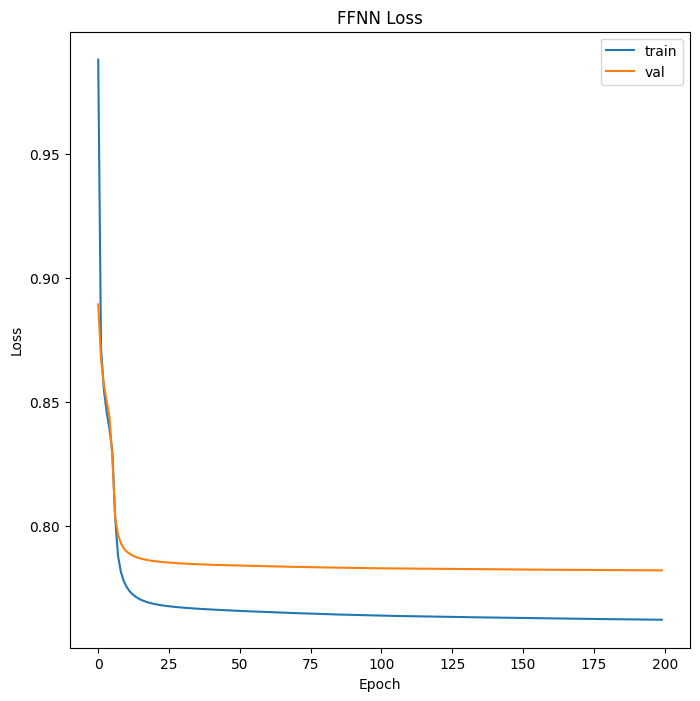

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8,8))
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('FFNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['train', 'val'], loc='upper right')
plt.show()


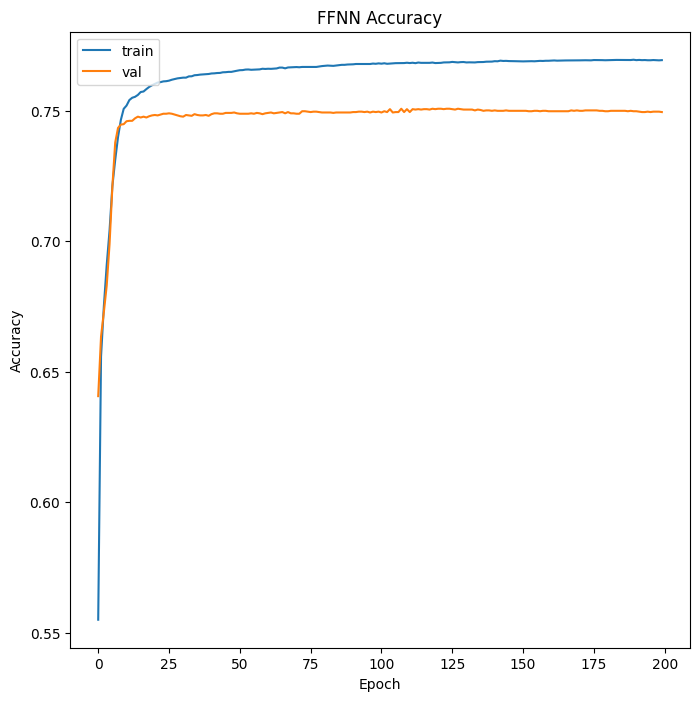

In [ ]:
figure(figsize=(8,8))
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('FFNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#ลองทำนายจากชุดเทส
tfidfX_test = tfidfX_test.to(device)
Y_test = Y_test.to(device)

# Forward pass to get output
first_model.eval()
test_prediction = first_model.forward(tfidfX_test.float())
#test_prediction = torch.squeeze(test_prediction)

#Calculate accuracy on test set
test_accuracy = calculate_accuracy(Y_test,test_prediction)

print("Test Accuracy:",round(test_accuracy.item(),4), "\n")

Test Accuracy: 0.7485 



In [ ]:
import torch

# สมมติว่า tensor เป็น tensor ที่ต้องการ gradient
tensor_with_grad = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# ใช้ .detach().numpy() แทน .numpy()
numpy_array = tensor_with_grad.detach().numpy()

# หรือจะใช้ .detach().cpu().numpy() หาก tensor อยู่บน GPU
numpy_array_on_cpu = tensor_with_grad.detach().cpu().numpy()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Evaluate the model on the validation set
with torch.no_grad():
    # Move the validation data to the device
    tfidfX_val = tfidfX_val.to(device)
    Y_val = Y_val.to(device)

    # Forward pass to get predictions
    val_predictions = first_model(tfidfX_val.float())
    val_predictions = torch.argmax(val_predictions, dim=1).cpu().numpy()
    Y_val = torch.argmax(Y_val, dim=1).cpu().numpy()

# Create the confusion matrix
cm = confusion_matrix(Y_val, val_predictions)

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(cm)


AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [ ]:
#Show the classification report
test_prediction = test_prediction.to(device)
print(test_prediction.shape)
test_prediction = test_prediction.cpu().argmax(-1)
Y_test = Y_test.cpu()
print(Y_test.shape)
print(classification_report(Y_test,test_prediction))

torch.Size([7818, 3])
torch.Size([7818])
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2606
           1       0.70      0.67      0.69      2606
           2       0.84      0.84      0.84      2606

    accuracy                           0.76      7818
   macro avg       0.76      0.76      0.76      7818
weighted avg       0.76      0.76      0.76      7818

